# Algunos apuntes para el parcial

## ➡️ Seaborn Objects y Seaborn

### Primero, importamos  `gapminder` que nos va a servir para hacer los ejemplos

In [15]:
from gapminder import gapminder
import seaborn.objects as so

### Vemos qué tipo de datos tenemos en el `dataset`. Observamos que `gapminder` es un `DataFrame` de pandas. Y que cada columna es una `Series` de pandas.

In [16]:
type(gapminder), type(gapminder.country)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

### Si ponemos solamente `so.Plot()` con los valores necesarios, no vamos a ver nada ya que tenemos que agregar el metodo `add()` para que se muestre el gráfico. 

### Los que casi siempre usamos son 
#### - `so.Line()`
#### - `so.Dot()`
#### - `so.Bar()`
#### - `so.Hist()`

### Graficamos el `gdpPercapita` vs `year`, para ciertos paises en particular. Notar que podemos usar el canal de color para diferenciar los países.

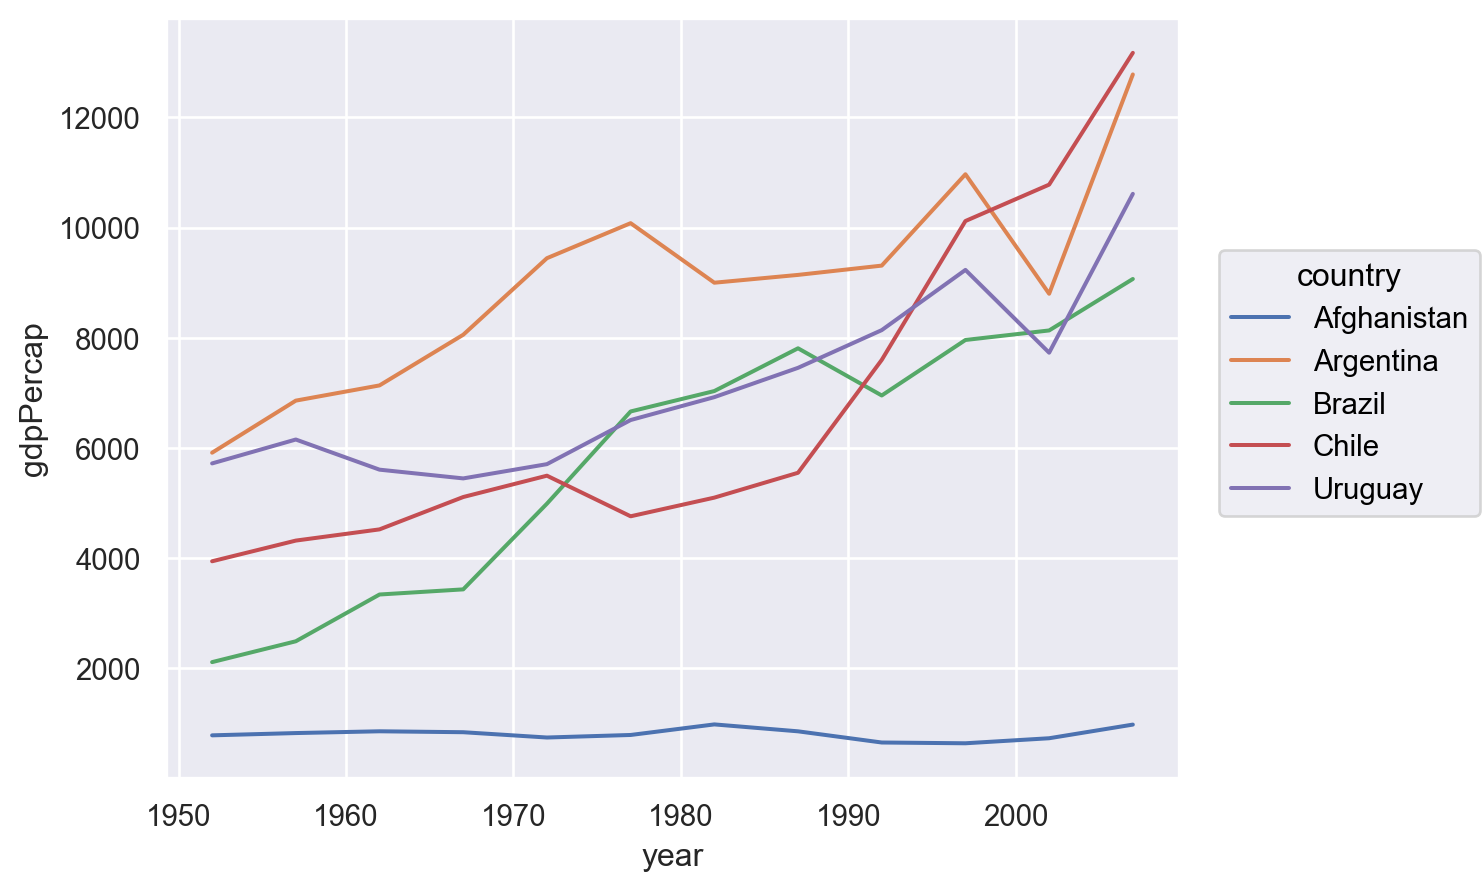

In [17]:
countries_interes = ["Argentina", "Brazil", "Chile", "Uruguay", "Afghanistan"]
(
    so.Plot(
        data=gapminder[gapminder.country.isin(
            countries_interes)],
        x="year",
        y="gdpPercap",
        color="country")
    .add(so.Line())
)

### También podemos calcular su regresión lineal utilizando el método `so.PolyFit()` adentro del método `add()`.

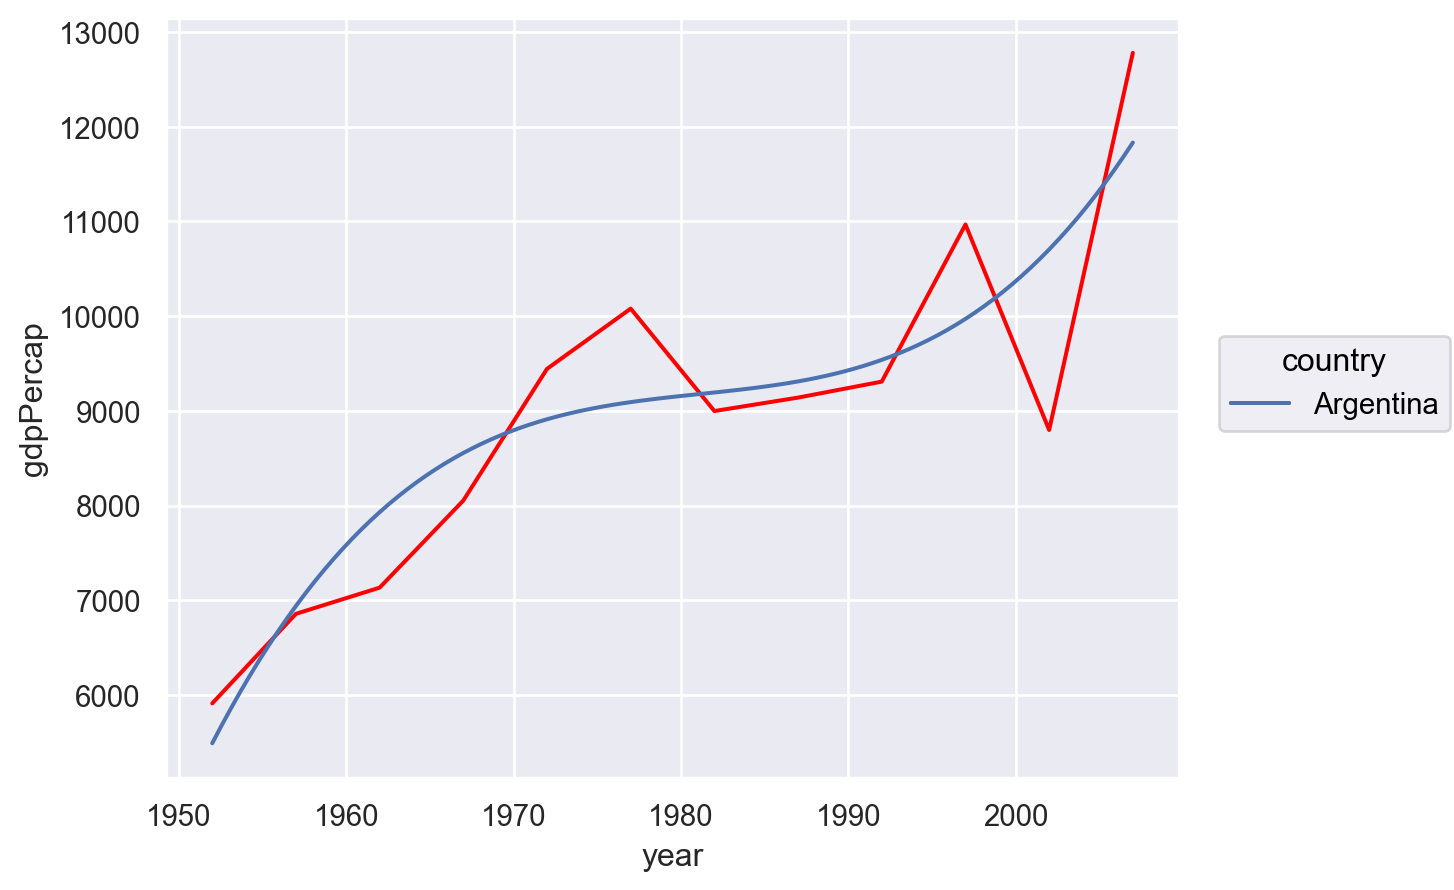

In [18]:
countries_interes = ["Argentina"]
(
    so.Plot(
        data=gapminder[gapminder.country.isin(countries_interes)],
        x="year",
        y="gdpPercap",
        color="country")
    .add(so.Line(color="red"))
    # El número 3 en el argumento representa el grado del polinomio
    .add(so.Line(), so.PolyFit(3))
)

### O podemos crear un histograma con el metodo `Hist()`. Tener en cuenta que el método `Hist()` no necesita de un eje y, ya que se encarga de contar la cantidad de veces que aparece cada valor en el eje x.

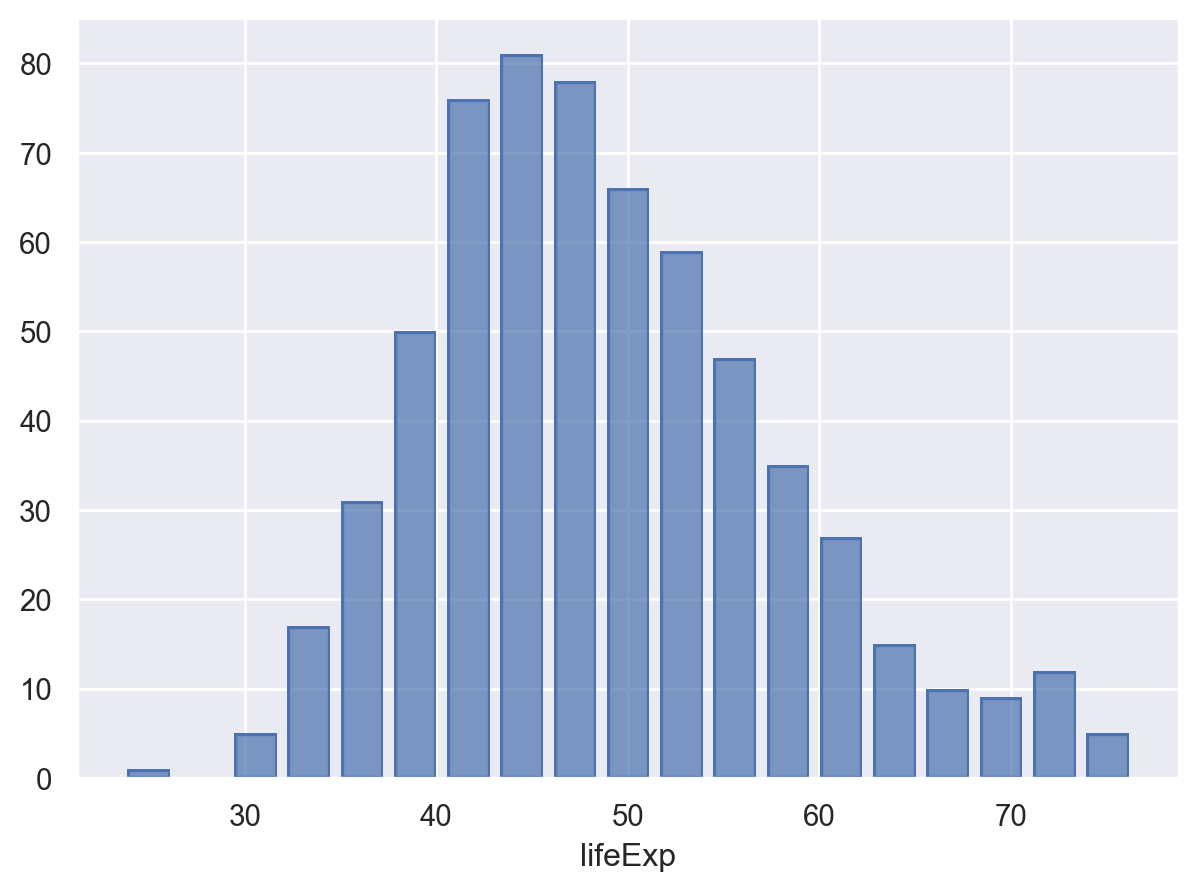

In [19]:
(
    so.Plot(
        data=gapminder[gapminder.continent.isin(["Africa"])], x="lifeExp")
    .add(so.Bar(), so.Hist())
)

### En Seaborn Objects no tenemos la posibilidad de crear box plots. Para los mismos, utilizamos la librería Seaborn.

<Axes: xlabel='gdpPercap'>

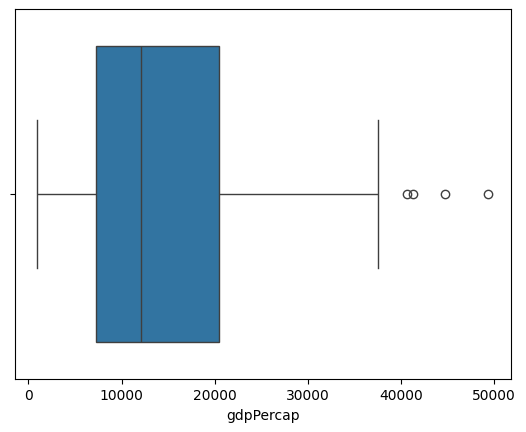

In [20]:
(
    sns.boxplot(
        gapminder[gapminder.continent.isin(["Europe"])],
        x="gdpPercap")
)

### También podemos comparar distintos tipos de datos, agregando la variable `y` a nuestro gráfico.

<Axes: xlabel='gdpPercap', ylabel='continent'>

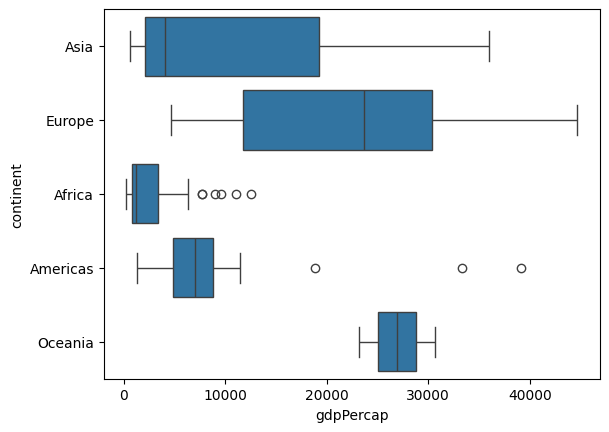

In [21]:
import seaborn as sns

# Esto representa el gdpPercap por cada continente en el año 2002
sns.boxplot(gapminder[gapminder.year==2002], x="gdpPercap", y="continent")

## ➡️ Regresión Lineal

### La regresión lineal es un modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente Y y las variables independientes X. Este modelo puede ser expresado como:

### $$ Y = \beta_0 + \beta_1 X $$

### Vamos a utilizar el dataset tips de Seaborn para hacer un ejemplo de regresión lineal, analizando lo que se gasta en propinas en función del total de la cuenta.

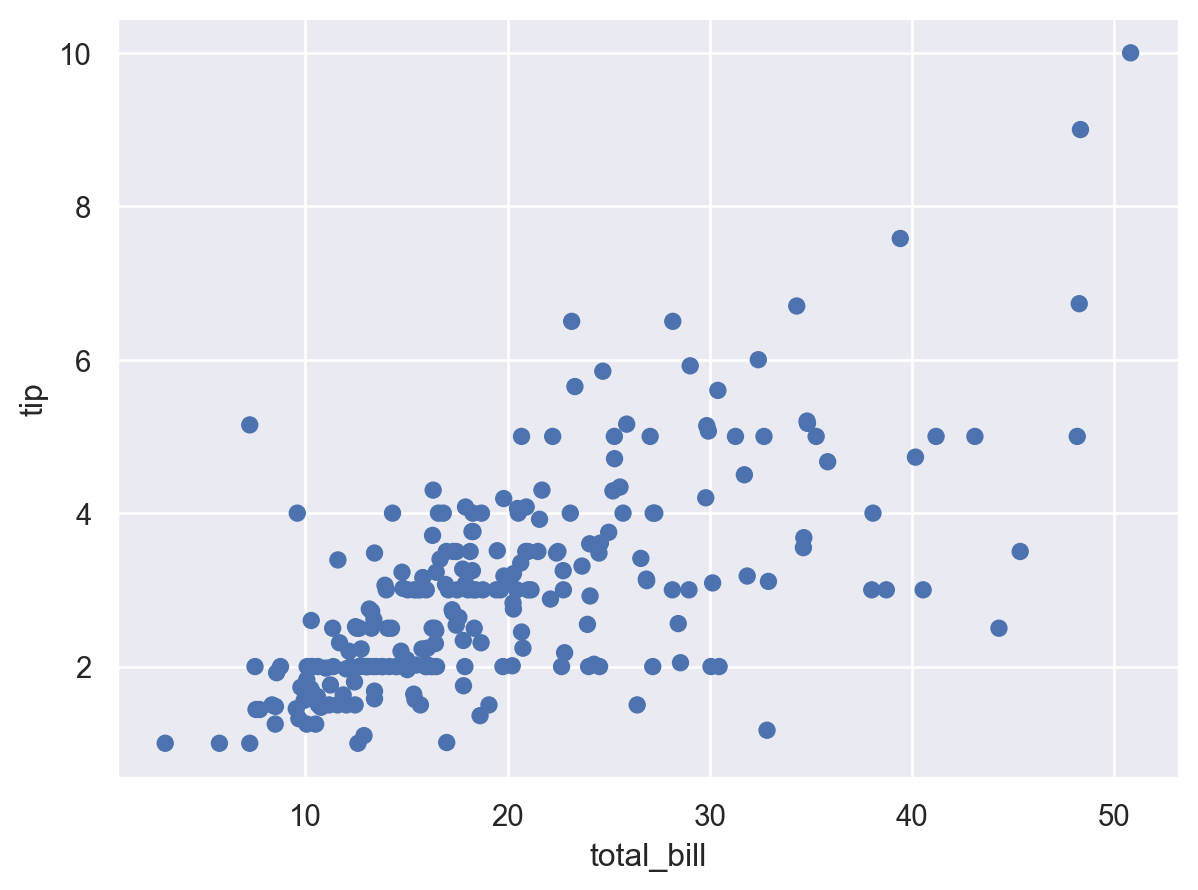

In [22]:
# Importamos librerías necesarias

import seaborn.objects as so

datos = sns.load_dataset('tips')

(
    so.Plot(data=datos, x="total_bill", y="tip")
    .add(so.Dot())
)

### Para hacer una regresión lineal, utilizamos el método `so.PolyFit()` de Seaborn. Prestar atención que va al lado del argumento `so.Line()`!

### El valor 1 adentro del argumento de so.PolyFit() indica el grado del polinomio. En este caso es un polinomio de grado 1.

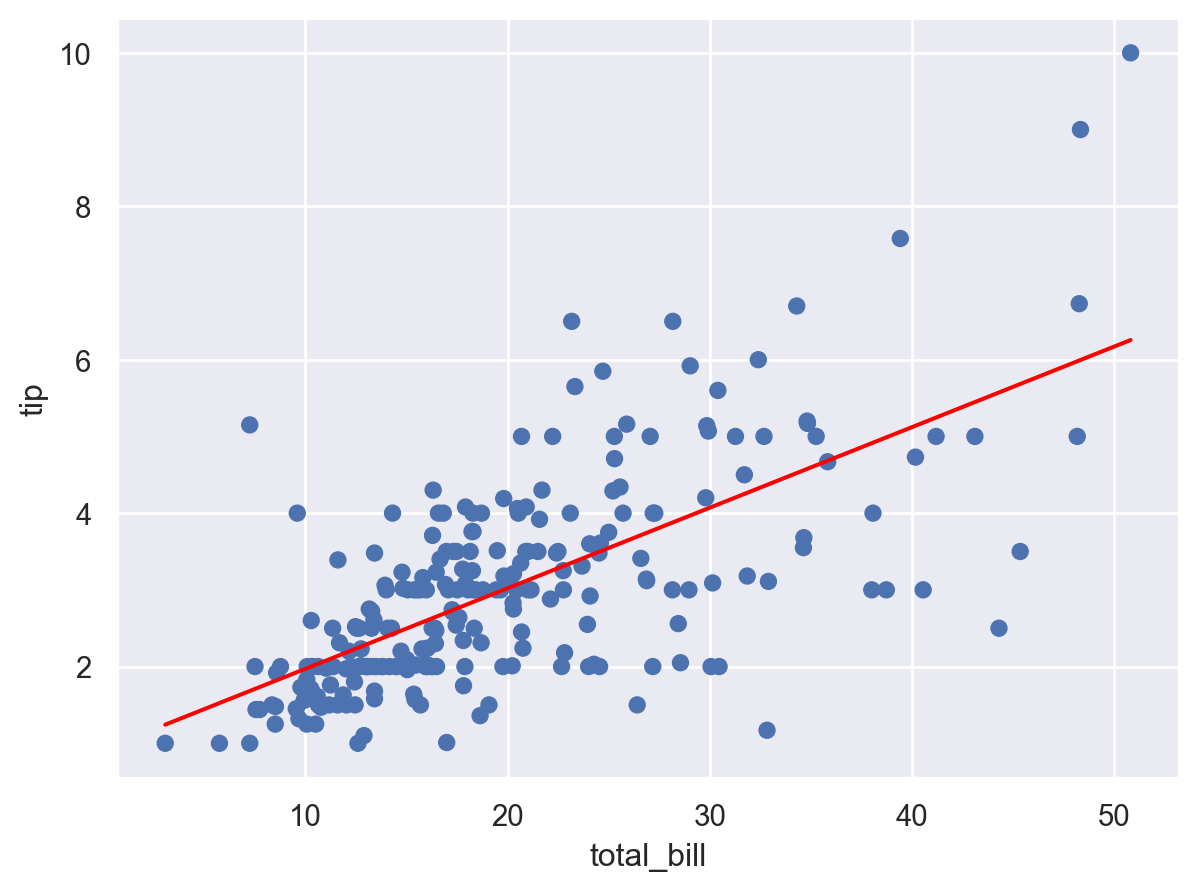

In [23]:

(
    so.Plot(data=datos, x="total_bill", y="tip")
    .add(so.Dot())
    # Agregamos el color rojo para diferenciarla. 
    # De nuevo, prestar atención a donde se coloca el argumento del color:
    .add(so.Line(color="red"), so.PolyFit(1))
)

### Calculemos los coeficientes y las predicciones.

### Si bien `seaborn` nos permite hacer regresiones lineales, no nos permite calcular los coeficientes de la regresión. Para ello, utilizamos la librería `sklearn`.

### Los métodos que vamos a utilizar en este modelo son:

### - `fit()`: Ajusta el modelo a los datos.
### - `coef_`: Nos devuelve los coeficientes de la regresión.
### - `intercept_`: Nos devuelve el intercepto u ordenada al origen de la regresión.
### - `predict()`: Nos permite hacer predicciones.

### Notar que el intercepto y los coeficientes se suelen llamar $\beta_0$ y $\beta_1$ respectivamente.

### Métodos `fit()`, `coef_` e `intercept_`

In [24]:
from sklearn import linear_model

# Inicializamos nuestro modelo:
modelo_lineal = linear_model.LinearRegression()

# Ajustamos el modelo a nuestros datos:
modelo_lineal.fit(datos[['total_bill']], datos[['tip']])

# Calculamos los coeficientes, en este caso como tenemos una sola variable, 
# es uno solo:
print("Coeficiente principal:", modelo_lineal.coef_)

# Calculamos la ordenada al origen, o también llamado 
# intercepto:
print("Ordenada al origen:", modelo_lineal.intercept_)

Coeficiente principal: [[0.10502452]]
Ordenada al origen: [0.92026961]


#### Algo importante: Si ven el doble corchete en datos[['total_bill']] es porque estamos pasando un DataFrame de pandas. Esto es necesario para que sklearn pueda trabajar con los datos.

In [25]:
# Veamos la diferencia:
print("Tipo de dato de [['total_bill']]:", type(datos[['total_bill']]))
print("Tipo de dato de ['total_bill']:", type(datos['total_bill']))

Tipo de dato de [['total_bill']]: <class 'pandas.core.frame.DataFrame'>
Tipo de dato de ['total_bill']: <class 'pandas.core.series.Series'>


#### Con esto vemos que la recta que mejor aproxima estos datos es 
#### $$ Y = 0.92 + 0.105 X$$

### Método `predict()`

In [26]:
import pandas as pd

# Creamos el DataFrame con las predicciones que queremos realizar:
valores_a_predecir = pd.DataFrame({
    'total_bill': [120]
})

modelo_lineal.predict(valores_a_predecir)

array([[13.5232117]])

#### Esto significa que si la cuenta es de 120 dólares, la propina va a ser de más o menos 13 dólares.